In [184]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [360]:
with open("buk1_e0.7_86400s.mca") as file:
    lines = file.read().splitlines()

start_index = lines.index("<<DATA>>") + 1
stop_index  = lines.index("<<END>>")
Y = np.array([int(hitcount) for hitcount in lines[start_index:stop_index]])

# 252 keV
bad fit :(

ended up manually setting baseline

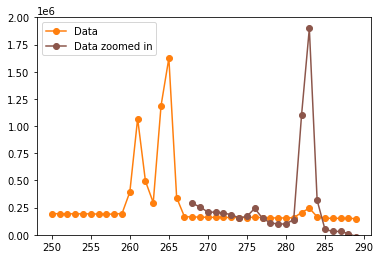

In [914]:
xx  = np.arange(250,290)
xx2 = np.arange(268,290)

plt.plot(xx, Y[xx], "o-", label="Data", color="C1")
plt.plot(xx2, Y[xx2]*20-3e6, "o-", label="Data zoomed in", color="C5")
plt.ylim(0, 2e6)
plt.legend();

In [919]:
def gauss(x, p, w):
    return np.e**(-np.log(2) * ((x-p) / (w/2))**2)

asd = lambda x, p1, p2, p3, p4, A1, A2, A3, A4, w: 0.1575 +0.023/40*(274-x) + A1*gauss(x, p1, w) + A2*gauss(x, p2, w) + A3*gauss(x, p3, w) + A4*gauss(x, p4, w)

In [920]:
p_opts, p_cov = curve_fit (asd, xx, Y[xx]/1e6,
                           [262, 265, 277, 283, 0.75, 1.5, 0.005, 0.05, 2],
                           bounds=([259, 263, 275, 281, 0.5, 1,   0,    0,    0.2],
                                   [263, 267, 277, 284, 1,   1.5, 0.02, 0.25, 8]))

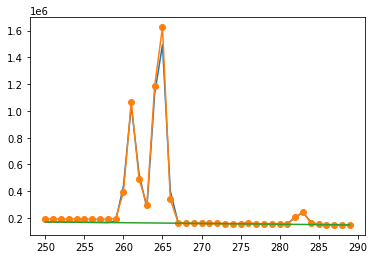

In [921]:
plt.plot(xx, asd(xx, *p_opts)*1e6)
plt.plot(xx, Y[xx], "o-")
plt.plot(xx, (0.1575 +0.023/40*(274-xx))*1e6)

(150000.0, 170000.0)

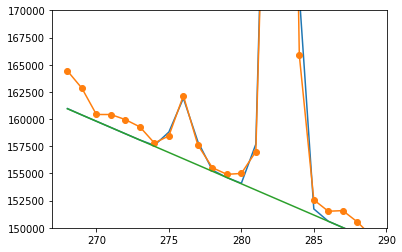

In [922]:
plt.plot(xx2, asd(xx2, *p_opts)*1e6)
plt.plot(xx2, Y[xx2], "o-")
plt.plot(xx2, (0.1575 +0.023/40*(274-xx2))*1e6)
plt.ylim(0.15e6, 0.17e6)
#plt.plot(np.arange(265,290), Y[265:290]*20-3e6, "o-")

9796.0

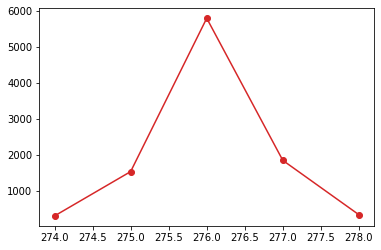

In [893]:
x1, x2 = 274, 279
plt.plot(range(x1, x2), Y[x1:x2] - (0.1575 +0.023/40*(274-np.arange(x1, x2)))*1e6, "-o", color="C3")
sum(Y[x1:x2] - (0.1575 +0.023/40*(274-np.arange(x1, x2)))*1e6)

# 277 keV

In [854]:
def gauss(x, p, w):
    return np.e**(-np.log(2) * ((x-p) / (w/2))**2)

asd = lambda x, c, d, p1, p2, p3, p4, A1, A2, A3, A4, w: c +d*(290-x) + A1*gauss(x, p1, w) + A2*gauss(x, p2, w) + A3*gauss(x, p3, w) + A4*gauss(x, p4, w)

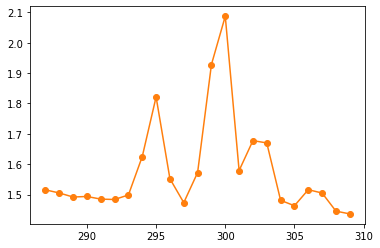

In [855]:
xx  = np.arange(287,310)
xx_ = np.arange(287,310, 0.001)

plt.plot(xx, Y[xx]/1e5, "o-", color="C1")

In [856]:
p_opts, p_cov = curve_fit (asd, xx, Y[xx]/1e5,
                           [1.5, 0.1/20, 295, 300, 303, 306, 0.3, 0.6, 0.2, 0.08, 1.5])

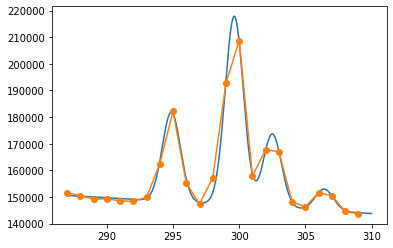

In [857]:
plt.plot(xx_, asd(xx_, *p_opts)*1e5)
plt.plot(xx, Y[xx], "o-")

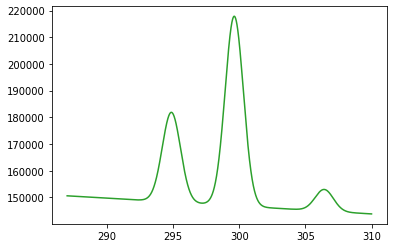

In [858]:
p_opts_copy = p_opts.copy()
p_opts_copy[-3] = 0
plt.plot(xx_, asd(xx_, *p_opts_copy)*1e5, color="C2")

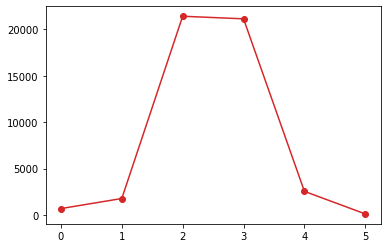

In [859]:
plt.plot(Y[300:306] - asd(np.arange(300, 306), *p_opts_copy)*1e5, "-o", color="C3")

In [860]:
sum(Y[300:306] - asd(np.arange(300, 306), *p_opts_copy)*1e5)

47677.92169746064

# 583 keV

In [861]:
def gauss(x, p, w):
    return np.e**(-np.log(2) * ((x-p) / (w/2))**2)

asd = lambda x, c, d, p1, p2, A1, A2, w: c +d*(622-x) + A1*gauss(x, p1, w) + A2*gauss(x, p2, w)

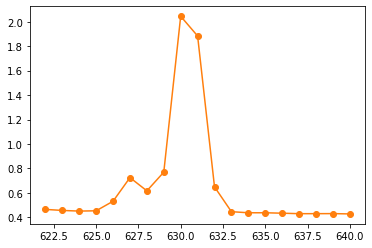

In [862]:
xx  = np.arange(622,641)
xx_ = np.arange(622,641, 0.001)

plt.plot(xx, Y[xx]/1e5, "o-", color="C1")

In [863]:
p_opts, p_cov = curve_fit (asd, xx, Y[xx]/1e5,
                           [0.4, 0.01/20, 627, 631, 0.4, 1.6, 1],
                          bounds=([0.4, -0.2/20, 626, 629, 0.25, 1.3, 0.5],
                                  [0.6, 0.2 /20, 628, 632, 0.5,  2,   2]))

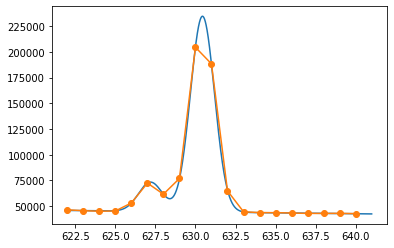

In [864]:
plt.plot(xx_, asd(xx_, *p_opts)*1e5)
plt.plot(xx, Y[xx], "o-")

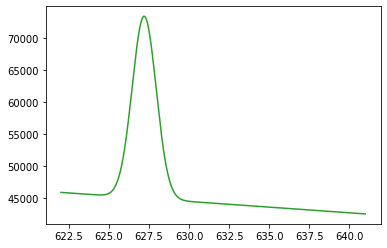

In [865]:
p_opts_copy = p_opts.copy()
p_opts_copy[-2] = 0
plt.plot(xx_, asd(xx_, *p_opts_copy)*1e5, color="C2")

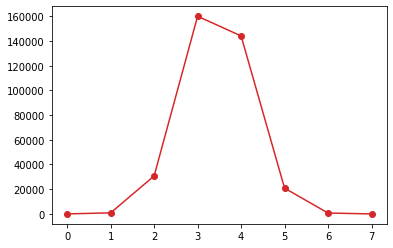

In [866]:
x1, x2 = 627,635
plt.plot(Y[x1:x2] - asd(np.arange(x1, x2), *p_opts_copy)*1e5, "-o", color="C3")

In [867]:
area = sum(Y[x1:x2] - asd(np.arange(x1, x2), *p_opts_copy)*1e5)
area

357239.37835808063

In [868]:
from matplotlib.ticker import AutoMinorLocator

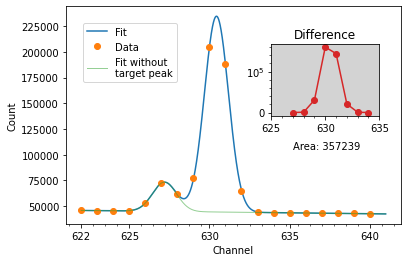

In [869]:
plt.plot(xx_, asd(xx_, *p_opts)*1e5, label="Fit")
plt.plot(xx, Y[xx], "o", label="Data")
plt.xticks([622, 625, 630, 635, 640])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel("Channel")
plt.ylabel("Count")

plt.plot(xx_, asd(xx_, *p_opts_copy)*1e5, alpha=0.5, label="Fit without\ntarget peak", lw=1, color="C2")

plt.legend(loc=(0.05, 0.65))




a = plt.axes([.60, .5, .25, .25], facecolor='lightgray')
plt.title('Difference')
plt.plot(range(x1, x2), Y[x1:x2] - asd(np.arange(x1, x2), *p_opts_copy)*1e5, "-o", color="C3", label="Difference")
plt.xticks([625, 630, 635])
plt.yticks([0, 1e5], ["0", "$10^5$"])
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())


plt.annotate("Area: %i" % area, (0.8, 0.43), xycoords="figure fraction", ha="center");

plt.savefig("double_peak_fit.svg", bbox_inches="tight")

## 1093 keV

once again the constant term was not fit properly, so I set it manually

In [872]:
def gauss(x, p, w):
    return np.e**(-np.log(2) * ((x-p) / (w/2))**2)

asd = lambda x, p1, p2, A1, A2, w: 0.187 + A1*gauss(x, p1, w) + A2*gauss(x, p2, w)

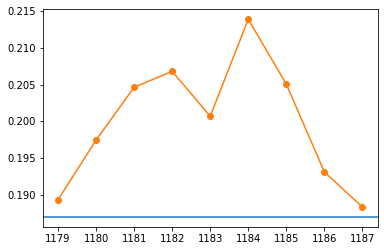

In [873]:
xx  = np.arange(1179,1188)
xx_ = np.arange(1179,1188, 0.001)

plt.plot(xx, Y[xx]/1e5, "o-", color="C1")
plt.axhline(0.187)

In [874]:
p_opts, p_cov = curve_fit (asd, xx, Y[xx]/1e5,
                           [1182, 1184, 0.02, 0.03, 2])

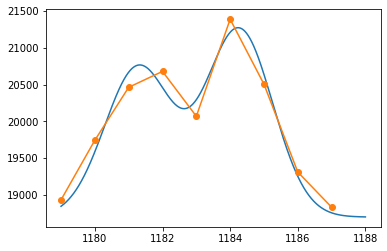

In [879]:
plt.plot(xx_, asd(xx_, *p_opts)*1e5)
plt.plot(xx, Y[xx], "o-", color="C1")

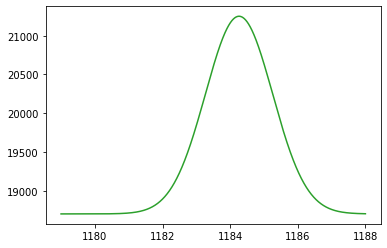

In [876]:
p_opts_copy = p_opts.copy()
p_opts_copy[-3] = 0
plt.plot(xx_, asd(xx_, *p_opts_copy)*1e5, color="C2")

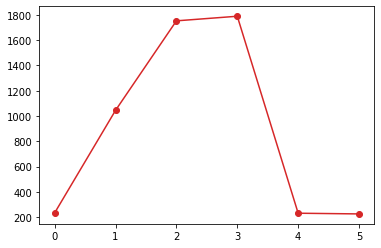

In [878]:
x1, x2 = 1179,1185
plt.plot(Y[x1:x2] - asd(np.arange(x1, x2), *p_opts_copy)*1e5, "-o", color="C3")

In [668]:
sum(Y[x1:x2] - asd(np.arange(x1, x2), *p_opts_copy)*1e5)

5276.8932164636935